Features to be used in this analysis:

* Pickup Location
* ....

Some rows don't have these locations, thus are discarded. Out of the 112M rows, only 96M remain after filtering.

The map we are going to do is called choropleth map (https://en.wikipedia.org/wiki/Choropleth_map).

Chicago boundary map downloaded from: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

In [101]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

### Trip Pickup Data

In [105]:
# pickup_df = pd.read_csv(filepath_or_buffer="geospatial/pickups.csv", index_col=0)
pickup_df = pd.read_csv(filepath_or_buffer="geospatial/dropoffs.csv", index_col=0)
# cols = ["month","year","dayofweek","hour","pickup_community_area"]
cols = ["month","year","dayofweek","hour","dropoff_community_area"]
pickup_df[cols] = pickup_df[cols].apply(pd.to_numeric, errors='coerce')
print(pickup_df.shape)
pickup_df.head()

(575090, 6)


,count(1),month,year,dayofweek,hour,dropoff_community_area
0,4939,2.0,2013.0,1.0,0.0,8.0
1,2655,2.0,2013.0,5.0,14.0,8.0
2,672,5.0,2014.0,1.0,8.0,33.0
3,1657,7.0,2016.0,4.0,19.0,28.0
4,1838,3.0,2013.0,7.0,18.0,28.0


In [106]:
pickup_df.dropna(inplace=True)

In [107]:
print(set(pickup_df["month"].values))

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}


In [108]:
print(set(pickup_df["year"].values))

{2016.0, 2017.0, 2013.0, 2014.0, 2015.0}


In [109]:
print(set(pickup_df["dayofweek"].values))

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}


In [110]:
print(set(pickup_df["hour"].values))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0}


In [112]:
# print(set(pickup_df["pickup_community_area"].values))
print(set(pickup_df["dropoff_community_area"].values))

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0}


### Map Data

In [113]:
map_df = gpd.read_file("geospatial/geo_export_af7b1343-1a5d-44fd-a368-8d398475fc5e.shp")
cols = ["area_num_1","area_numbe","comarea","comarea_id"]
map_df[cols] = map_df[cols].apply(pd.to_numeric, errors='coerce')
print(map_df.shape)
map_df.head()

(77, 10)


,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,POLYGON ((-87.60914087617894 41.84469250265398...
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,POLYGON ((-87.59215283879394 41.81692934626684...
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,POLYGON ((-87.62879823733725 41.80189303368919...
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.6067081256125 41.81681377057218,..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,POLYGON ((-87.59215283879394 41.81692934626684...


In [114]:
print(set(map_df["area"].values))

{0.0}


In [115]:
print(set(map_df["area_num_1"].values))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77}


In [116]:
print(set(map_df["area_numbe"].values))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77}


In [117]:
print(set(map_df["comarea"].values))

{0.0}


In [118]:
print(set(map_df["comarea_id"].values))

{0.0}


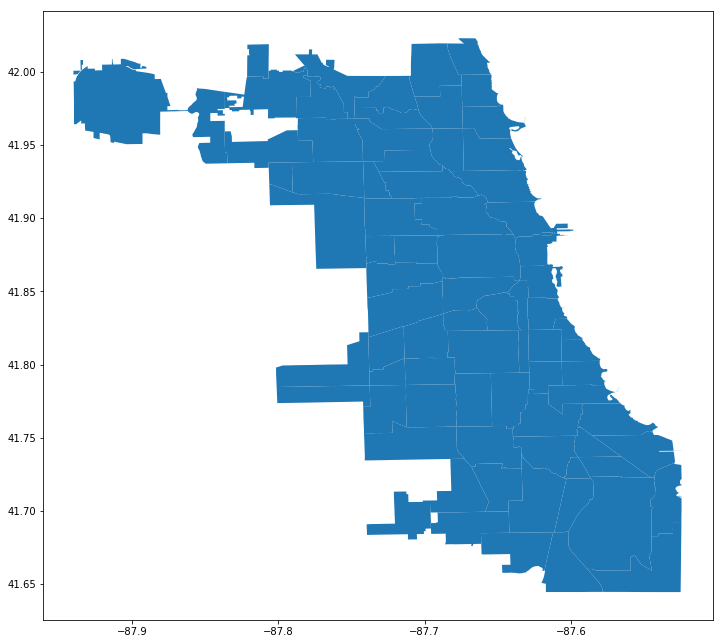

In [119]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = map_df.plot(ax=ax)
plt.show()
plt.close()

In [120]:
# df = pd.read_csv("geospatial/CommAreas.csv")
# df.head()

### Join DFs

Join the `pickup_community_area` column of `pickup_df` with `area_numbe` column of `map_df`

In [121]:
# merged = map_df.set_index('area_numbe').join(pickup_df.set_index('pickup_community_area'))
merged = map_df.set_index('area_numbe').join(pickup_df.set_index('dropoff_community_area'))
print(merged.shape)
merged.head()

(565848, 14)


,area,area_num_1,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,count(1),month,year,dayofweek,hour
1,0.0,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...,52,5.0,2016.0,3.0,14.0
1,0.0,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...,93,7.0,2014.0,6.0,19.0
1,0.0,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...,54,10.0,2016.0,6.0,20.0
1,0.0,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...,41,12.0,2013.0,4.0,12.0
1,0.0,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...,21,4.0,2017.0,1.0,9.0


### Sort the Merged DF

Sort by Year -> Month -> Dayofweek -> Hour

In [122]:
merged.sort_values(by=['year', 'month','dayofweek','hour'], inplace=True)
merged = merged[["area_num_1","geometry","count(1)","year","month","dayofweek","hour"]]
merged.head()

,area_num_1,geometry,count(1),year,month,dayofweek,hour
1,1,POLYGON ((-87.65455590025104 41.99816614970252...,113,2013.0,1.0,1.0,0.0
2,2,"POLYGON ((-87.6846530946559 42.0194847726953, ...",46,2013.0,1.0,1.0,0.0
3,3,POLYGON ((-87.64102430213292 41.95480280553257...,442,2013.0,1.0,1.0,0.0
4,4,"POLYGON ((-87.6744075678037 41.97610340441675,...",188,2013.0,1.0,1.0,0.0
5,5,"POLYGON ((-87.67336415409336 41.9323427446535,...",318,2013.0,1.0,1.0,0.0


In [123]:
polygons = merged[["area_num_1",'geometry']].drop_duplicates(subset = 'area_num_1')
polygons

,area_num_1,geometry
1,1,POLYGON ((-87.65455590025104 41.99816614970252...
2,2,"POLYGON ((-87.6846530946559 42.0194847726953, ..."
3,3,POLYGON ((-87.64102430213292 41.95480280553257...
4,4,"POLYGON ((-87.6744075678037 41.97610340441675,..."
5,5,"POLYGON ((-87.67336415409336 41.9323427446535,..."
6,6,POLYGON ((-87.64102430213292 41.95480280553257...
7,7,POLYGON ((-87.63181810269614 41.93258180263376...
8,8,POLYGON ((-87.62446476694345 41.91156699879239...
9,9,POLYGON ((-87.80675853375328 42.00083736081486...
10,10,POLYGON ((-87.78002228630051 41.99741355306097...


### Group By and Aggregate

Group by `year` & `month` & `dayofweek` & `area_num_1` and aggregate `count(1)` by SUM

In [124]:
groupby_cols = ['year','month','dayofweek','area_num_1']
aggmerged = merged.groupby(groupby_cols)['count(1)'].sum().reset_index()
aggmerged

,year,month,dayofweek,area_num_1,count(1)
0,2013.0,1.0,1.0,1,1256
1,2013.0,1.0,1.0,2,879
2,2013.0,1.0,1.0,3,4446
3,2013.0,1.0,1.0,4,1731
4,2013.0,1.0,1.0,5,2498
5,2013.0,1.0,1.0,6,20512
6,2013.0,1.0,1.0,7,16475
7,2013.0,1.0,1.0,8,38036
8,2013.0,1.0,1.0,9,50
9,2013.0,1.0,1.0,10,186


In [125]:
# get the max of counts
max(aggmerged["count(1)"])

126356

### Join DFs Again

In [126]:
# agg2merged = aggmerged.join(merged.set_index('area_num_1')["geometry"])
agg2merged = aggmerged.merge(polygons[['area_num_1','geometry']], left_on='area_num_1', right_on='area_num_1')
print(agg2merged.shape)
agg2merged

(29490, 6)


,year,month,dayofweek,area_num_1,count(1),geometry
0,2013.0,1.0,1.0,1,1256,POLYGON ((-87.65455590025104 41.99816614970252...
1,2013.0,1.0,2.0,1,878,POLYGON ((-87.65455590025104 41.99816614970252...
2,2013.0,1.0,3.0,1,1255,POLYGON ((-87.65455590025104 41.99816614970252...
3,2013.0,1.0,4.0,1,969,POLYGON ((-87.65455590025104 41.99816614970252...
4,2013.0,1.0,5.0,1,1130,POLYGON ((-87.65455590025104 41.99816614970252...
5,2013.0,1.0,6.0,1,937,POLYGON ((-87.65455590025104 41.99816614970252...
6,2013.0,1.0,7.0,1,1242,POLYGON ((-87.65455590025104 41.99816614970252...
7,2013.0,2.0,1.0,1,1556,POLYGON ((-87.65455590025104 41.99816614970252...
8,2013.0,2.0,2.0,1,942,POLYGON ((-87.65455590025104 41.99816614970252...
9,2013.0,2.0,3.0,1,839,POLYGON ((-87.65455590025104 41.99816614970252...


### Subset Merged DF

In [127]:
submerged = agg2merged[((agg2merged['year'] == 2013) & (agg2merged['month'] == 1) & (agg2merged['dayofweek'] == 1))]
print(submerged.shape)
submerged.head()

(77, 6)


,year,month,dayofweek,area_num_1,count(1),geometry
0,2013.0,1.0,1.0,1,1256,POLYGON ((-87.65455590025104 41.99816614970252...
386,2013.0,1.0,1.0,2,879,"POLYGON ((-87.6846530946559 42.0194847726953, ..."
771,2013.0,1.0,1.0,3,4446,POLYGON ((-87.64102430213292 41.95480280553257...
1157,2013.0,1.0,1.0,4,1731,"POLYGON ((-87.6744075678037 41.97610340441675,..."
1542,2013.0,1.0,1.0,5,2498,"POLYGON ((-87.67336415409336 41.9323427446535,..."


In [128]:
print(set(pickup_df["year"].values))
print(set(pickup_df["month"].values))
print(set(pickup_df["dayofweek"].values))

list_year = sorted(list(set(pickup_df["year"].values)))
list_month = sorted(list(set(pickup_df["month"].values)))
list_dayofweek = sorted(list(set(pickup_df["dayofweek"].values)))

{2016.0, 2017.0, 2013.0, 2014.0, 2015.0}
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}


In [129]:
import itertools

In [130]:
list_time = list(itertools.product(list_year,list_month,list_dayofweek))
list_time

[(2013.0, 1.0, 1.0),
 (2013.0, 1.0, 2.0),
 (2013.0, 1.0, 3.0),
 (2013.0, 1.0, 4.0),
 (2013.0, 1.0, 5.0),
 (2013.0, 1.0, 6.0),
 (2013.0, 1.0, 7.0),
 (2013.0, 2.0, 1.0),
 (2013.0, 2.0, 2.0),
 (2013.0, 2.0, 3.0),
 (2013.0, 2.0, 4.0),
 (2013.0, 2.0, 5.0),
 (2013.0, 2.0, 6.0),
 (2013.0, 2.0, 7.0),
 (2013.0, 3.0, 1.0),
 (2013.0, 3.0, 2.0),
 (2013.0, 3.0, 3.0),
 (2013.0, 3.0, 4.0),
 (2013.0, 3.0, 5.0),
 (2013.0, 3.0, 6.0),
 (2013.0, 3.0, 7.0),
 (2013.0, 4.0, 1.0),
 (2013.0, 4.0, 2.0),
 (2013.0, 4.0, 3.0),
 (2013.0, 4.0, 4.0),
 (2013.0, 4.0, 5.0),
 (2013.0, 4.0, 6.0),
 (2013.0, 4.0, 7.0),
 (2013.0, 5.0, 1.0),
 (2013.0, 5.0, 2.0),
 (2013.0, 5.0, 3.0),
 (2013.0, 5.0, 4.0),
 (2013.0, 5.0, 5.0),
 (2013.0, 5.0, 6.0),
 (2013.0, 5.0, 7.0),
 (2013.0, 6.0, 1.0),
 (2013.0, 6.0, 2.0),
 (2013.0, 6.0, 3.0),
 (2013.0, 6.0, 4.0),
 (2013.0, 6.0, 5.0),
 (2013.0, 6.0, 6.0),
 (2013.0, 6.0, 7.0),
 (2013.0, 7.0, 1.0),
 (2013.0, 7.0, 2.0),
 (2013.0, 7.0, 3.0),
 (2013.0, 7.0, 4.0),
 (2013.0, 7.0, 5.0),
 (2013.0, 7.0

### Plotting

In [131]:
import datetime
import os

In [132]:
output_path = "charts/"

In [134]:
# for dayofweek in range(1,8):
for year, month, dayofweek in list_time:
#     print("{},{},{}".format(int(year), int(month), int(dayofweek)))
    dt = datetime.datetime(year=int(year), month=int(month), day=int(dayofweek)).strftime("%Y%m%d")
    print(dt)

    submerged = merged[((merged['year'] == year) & (merged['month'] == month) & (merged['dayofweek'] == dayofweek))]
#     print(submerged.shape)
    submerged.head()

    variable = 'count(1)'

    # set the range for the choropleth
    vmin, vmax = 0, max(aggmerged["count(1)"])

    fig, ax = plt.subplots(1, figsize=(3, 3))
    ax = submerged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')

    # add a title
    # ax.set_title('Preventable death rate in London', \
    #               fontdict={'fontsize': '25',
    #                         'fontweight' : '3'})
    
    ax.annotate(str(dt),xy=(0.1, .08),  
                xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='top', fontsize=12, color='#555555')

    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
#     plt.show()
    
    filepath = os.path.join(output_path, str(dt)+'_dropoff.jpg')
#     chart = plt.get_figure()
    plt.savefig(filepath, dpi=300)
    
    plt.close()


20130101
20130102
20130103
20130104
20130105
20130106
20130107
20130201
20130202
20130203
20130204
20130205
20130206
20130207
20130301
20130302
20130303
20130304
20130305
20130306
20130307
20130401
20130402
20130403
20130404
20130405
20130406
20130407
20130501
20130502
20130503
20130504
20130505
20130506
20130507
20130601
20130602
20130603
20130604
20130605
20130606
20130607
20130701
20130702
20130703
20130704
20130705
20130706
20130707
20130801
20130802
20130803
20130804
20130805
20130806
20130807
20130901
20130902
20130903
20130904
20130905
20130906
20130907
20131001
20131002
20131003
20131004
20131005
20131006
20131007
20131101
20131102
20131103
20131104
20131105
20131106
20131107
20131201
20131202
20131203
20131204
20131205
20131206
20131207
20140101
20140102
20140103
20140104
20140105
20140106
20140107
20140201
20140202
20140203
20140204
20140205
20140206
20140207
20140301
20140302
20140303
20140304
20140305
20140306
20140307
20140401
20140402
20140403
20140404
20140405
20140406
2

/Users/atakanokan/anaconda/lib/python3.6/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


20170803
20170804
20170805
20170806
20170807
20170901
20170902
20170903
20170904
20170905
20170906
20170907
20171001
20171002
20171003
20171004
20171005
20171006
20171007
20171101
20171102
20171103
20171104
20171105
20171106
20171107
20171201
20171202
20171203
20171204
20171205
20171206
20171207


### GIF

In [139]:
filenames = os.listdir('charts/')
filenames = [x for x in filenames if 'dropoff' in x]
filenames.sort()
# filenames = filenames[1:]
print(filenames)

['20130101_dropoff.jpg', '20130102_dropoff.jpg', '20130103_dropoff.jpg', '20130104_dropoff.jpg', '20130105_dropoff.jpg', '20130106_dropoff.jpg', '20130107_dropoff.jpg', '20130201_dropoff.jpg', '20130202_dropoff.jpg', '20130203_dropoff.jpg', '20130204_dropoff.jpg', '20130205_dropoff.jpg', '20130206_dropoff.jpg', '20130207_dropoff.jpg', '20130301_dropoff.jpg', '20130302_dropoff.jpg', '20130303_dropoff.jpg', '20130304_dropoff.jpg', '20130305_dropoff.jpg', '20130306_dropoff.jpg', '20130307_dropoff.jpg', '20130401_dropoff.jpg', '20130402_dropoff.jpg', '20130403_dropoff.jpg', '20130404_dropoff.jpg', '20130405_dropoff.jpg', '20130406_dropoff.jpg', '20130407_dropoff.jpg', '20130501_dropoff.jpg', '20130502_dropoff.jpg', '20130503_dropoff.jpg', '20130504_dropoff.jpg', '20130505_dropoff.jpg', '20130506_dropoff.jpg', '20130507_dropoff.jpg', '20130601_dropoff.jpg', '20130602_dropoff.jpg', '20130603_dropoff.jpg', '20130604_dropoff.jpg', '20130605_dropoff.jpg', '20130606_dropoff.jpg', '20130607_dropo

In [140]:
import imageio
images = []
for filename in filenames:
    try:
        images.append(imageio.imread("charts/" + filename))
    except:
        pass

In [141]:
# imageio.mimsave('gifs/pickup.gif', images, duration=0.1)
imageio.mimsave('gifs/dropoff.gif', images, duration=0.1)